In [149]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [150]:
#Model Parameters
t = 0.01

In [151]:
#Vehicle Parameters
m = 20
lf = 0.25
lr = 0.25
b = 0.3
Iz = m*((lf+lr)**2 + b**2)/12

In [152]:
#Tyre parameters
Bf = 9.242
Br = 17.716
Cf = 0.085
Cr = 0.133
Df = 134.585
Dr = 159.919
Cm1 = 20
Cm2 = 6.92e-7
Cd = 0

In [153]:
#Tyre Forces
def tyre_forces(vx,vy,w,delta,d):
    af = -np.arctan((w*lf + vx)/vx) + delta
    ar = np.arctan((w*lr - vy)/vx)
    Ffy = Df*np.sin(Cf*np.arctan(Bf*af))
    Fry = Dr*np.sin(Cr*np.arctan(Br*ar))
    Frx = (Cm1 - Cm2*vx)*d - Cr - Cd*(vx**2)
    return Ffy,Fry,Frx

In [154]:
#Vehicle Dynamics
def vehicle(xo,yo,phio,vxo,vyo,wo,delta,d):
    Ffy,Fry,Frx = tyre_forces(vx,vy,delta,d)
    x = xo + (vx*np.cos(phi) - vy*np.sin(phi))*t
    y = yo + (vx*np.sin(phi) + vy*np.cos(phi))*t
    phi = phio + w*t
    vx = vxo + (Frx - Ffy*np.sin(delta) + m*vy*w)*t/m
    vy = vyo + (Fry + Ffy*np.cos(delta) - m*vx*w)*t/m
    w = wo + (Ffy*lf*np.cos(delta) - Fry*lr)*t/Iz

In [155]:
#Reference Path:
xref = np.linspace(0,np.pi/2)
yref = np.sin(xref)
path = [xref,yref]

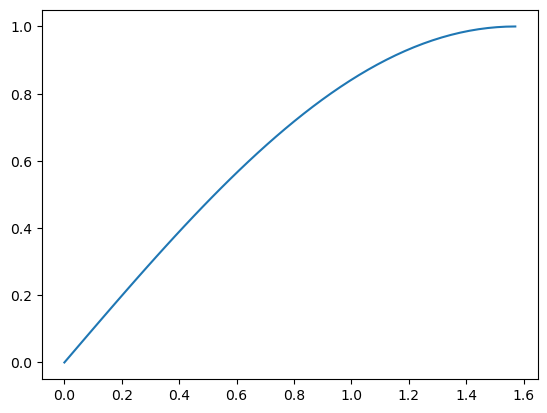

In [156]:
plt.plot(path[0],path[1])

In [157]:
spline = CubicSpline(path[0], path[1])
def calculate_arc_lengths(x, y):
        xp = np.linspace(0,path[0][-1],1000)
        yp = spline(xp)
        dydx = spline(xp,1)
        arc_lengths = [0]
        for i in range(1, len(xp)):
            arc_lengths.append(arc_lengths[i - 1] + np.sqrt((yp[i]-yp[i-1])**2 + (xp[i]-xp[i-1])**2))
        return arc_lengths, xp, yp, dydx    
arc_lengths,xp,yp,dydx = calculate_arc_lengths(path[0], path[1])
def data(theta):
    index = 0
    for i in range(len(arc_lengths)):
        if(abs(arc_lengths[i]-theta)>0.01):
            continue
        else:
            index = i
            break
    return xp[i],yp[i],dydx[i]